In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_train=pd.read_csv("train_ab.csv")
df_test=pd.read_csv("test_ab.csv")

In [ ]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [ ]:
df_train.set_index("id",inplace=True)
df_test.set_index("id",inplace=True)

In [ ]:
df_train['Volume']=df_train['Length']*df_train['Diameter']*df_train['Height']
df_test['Volume']=df_test['Length']*df_test['Diameter']*df_test['Height']
df_train["surface_area"]=df_train["Length"]*df_train["Diameter"]
df_test["surface_area"]=df_test["Length"]*df_test["Diameter"]
df_train['total_area']=2*(df_train["surface_area"]+df_train["Height"]*df_train["Diameter"]+df_train["Length"]*df_train["Height"])
df_test['total_area']=2*(df_test["surface_area"]+df_test["Height"]*df_test["Diameter"]+df_test["Length"]*df_test["Height"])
df_train['approx_density']=df_train['Whole weight']/(df_train['surface_area']*df_train['Height']+1e-5)
df_test['approx_density']=df_test['Whole weight']/(df_test['surface_area']*df_test['Height']+1e-5)

#####
df_train['Shell weight']=np.where(df_train['Shell weight']>df_train['Whole weight'],df_train['Whole weight'],df_train['Shell weight'])
df_test['Shell weight']=np.where(df_test['Shell weight']>df_test['Whole weight'],df_test['Whole weight'],df_test['Shell weight'])
##########


# Abalone BMI
df_train['bmi']=df_train['Whole weight']/(df_train['Height']**2+1e-5)
df_test['bmi']=df_test['Whole weight']/(df_test['Height']**2+1e-5)

#derived features
df_train["length_dia_ratio"]=df_train['Length']/(df_train['Diameter']+1e-5)
df_test["length_dia_ratio"]=df_test['Length']/(df_test['Diameter']+1e-5)
df_train["length_height_ratio"]=df_train['Length']/(df_train['Height']+1e-5)
df_test["length_height_ratio"]=df_test['Length']/(df_test['Height']+1e-5)
df_train["Weigth_per_Area"] = df_train["Whole weight"]/(df_train["Length"]*df_train["Diameter"])
df_test["Weigth_per_Area"] = df_test["Whole weight"]/(df_test["Length"]*df_test["Diameter"])

df_train['shell_tot_ratio']=df_train['Shell weight']/(df_train['Whole weight']+1e-5)
df_test['shell_tot_ratio']=df_test['Shell weight']/(df_test['Whole weight']+1e-5)
df_train['shell_body_ratio']=df_train['Shell weight']/(df_train['Shell weight']+df_train['Whole weight']+1e-5)
df_test['shell_body_ratio']=df_test['Shell weight']/(df_test['Shell weight']+df_test['Whole weight']+1e-5)
df_train['inv_shell_tot']= df_train['Whole weight'] /( df_train['Shell weight']+1e-5)
df_test['inv_shell_tot']= df_test['Whole weight'] /( df_test['Shell weight']+1e-5)



In [ ]:
df_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Volume', 'surface_area',
       'total_area', 'approx_density', 'bmi', 'length_dia_ratio',
       'length_height_ratio', 'Weigth_per_Area', 'shell_tot_ratio',
       'shell_body_ratio', 'inv_shell_tot'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Volume', 'surface_area',
       'total_area', 'approx_density', 'bmi', 'length_dia_ratio',
       'length_height_ratio', 'Weigth_per_Area', 'shell_tot_ratio',
       'shell_body_ratio', 'inv_shell_tot'],
      dtype='object')

In [ ]:
y_train=df_train['Rings']
X_train=df_train.drop('Rings',axis=1)
X_test=df_test

In [ ]:
num_cols=['Length','Diameter','Height','Whole weight','Whole weight.1','Whole weight.2','Shell weight','Volume','surface_area',
       'total_area', 'approx_density', 'bmi', 'length_dia_ratio',
       'length_height_ratio', 'Weigth_per_Area', 'shell_tot_ratio',
       'shell_body_ratio', 'inv_shell_tot']
cat_cols='Sex'

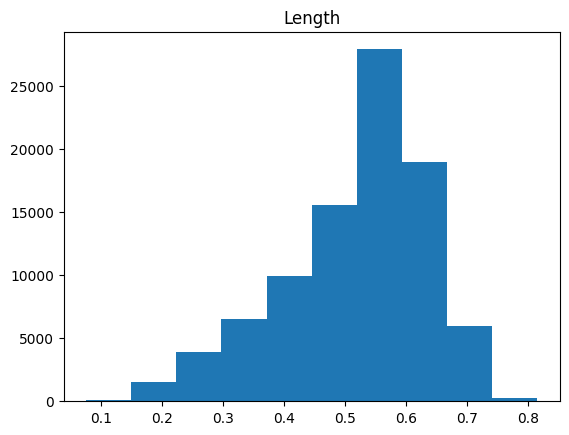

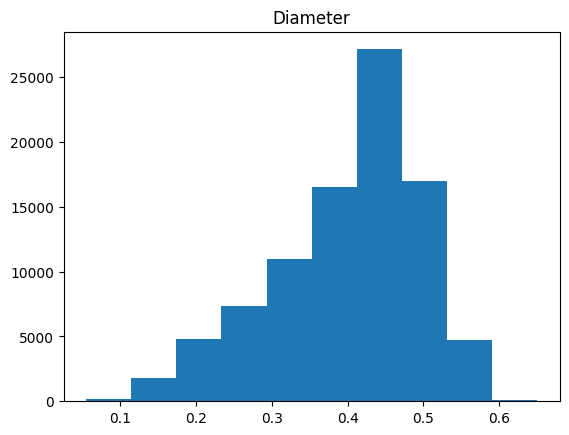

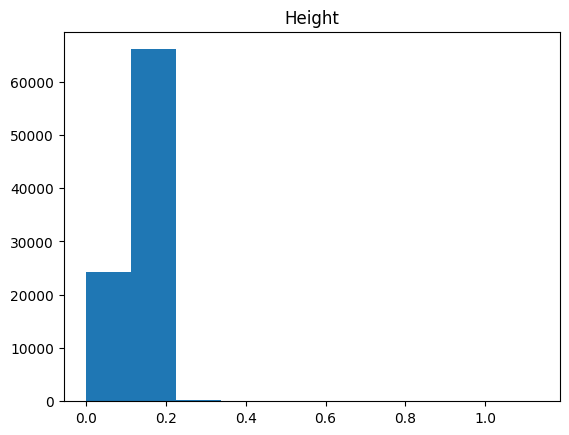

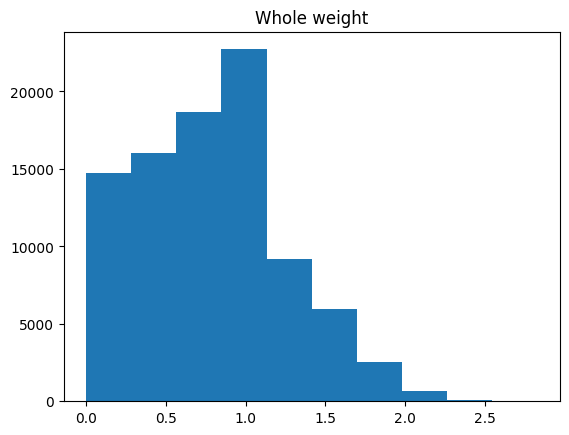

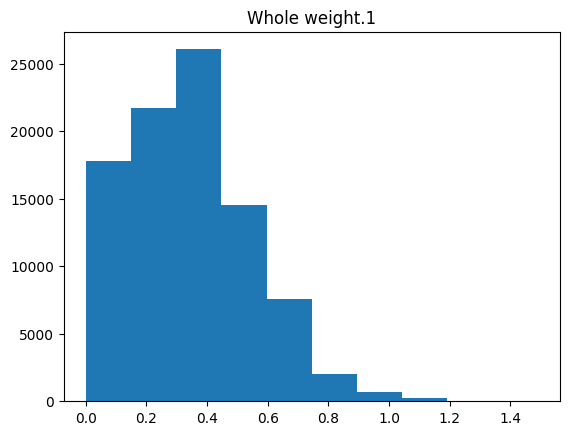

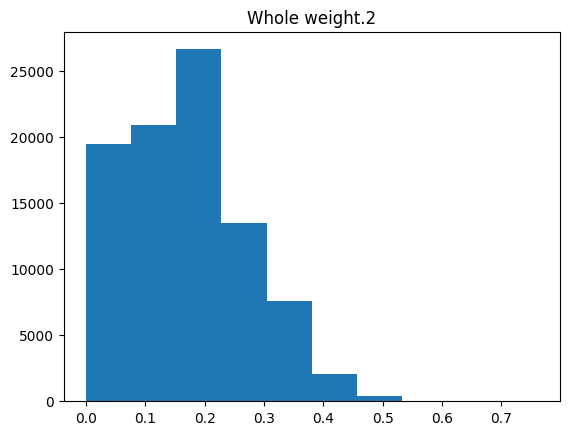

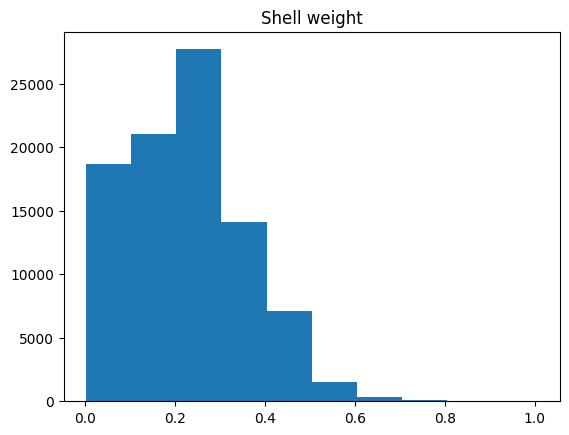

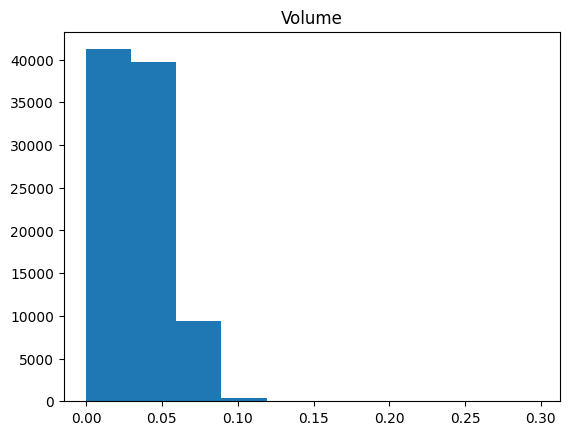

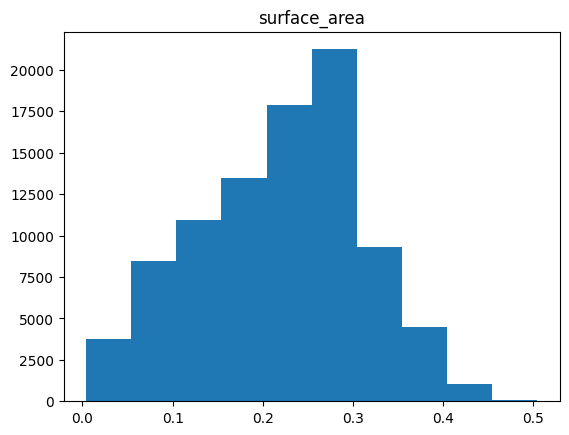

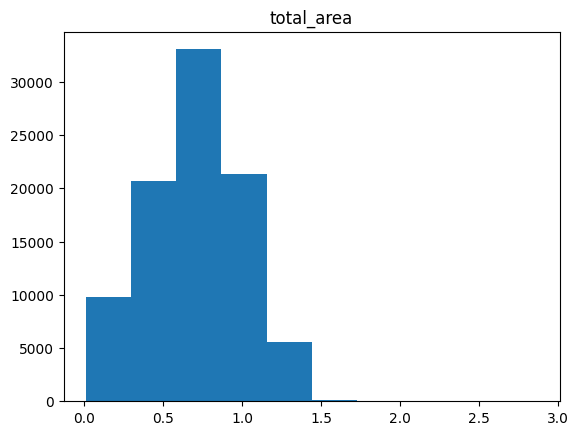

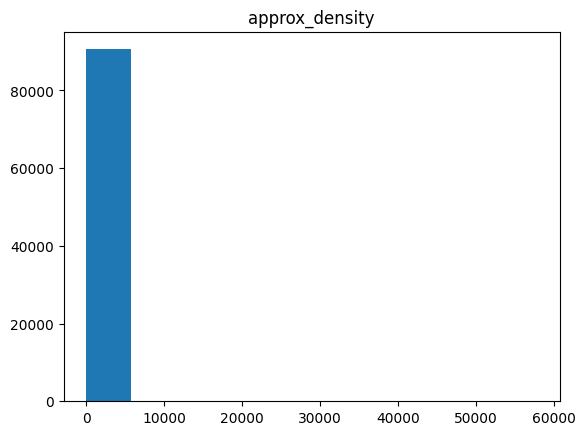

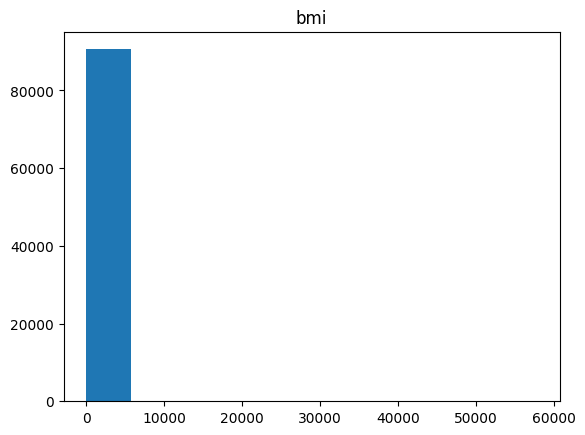

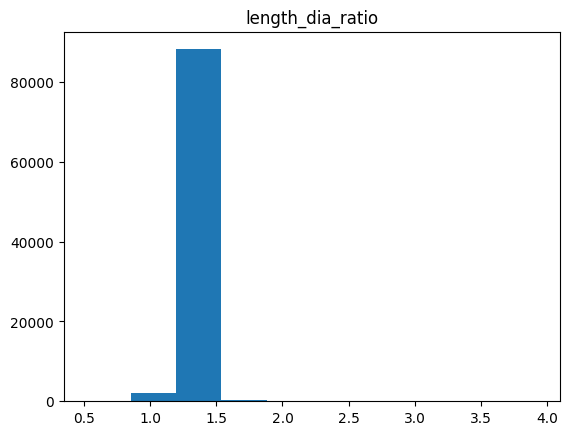

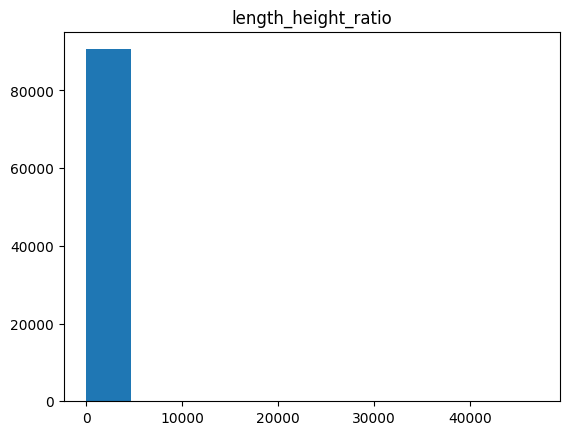

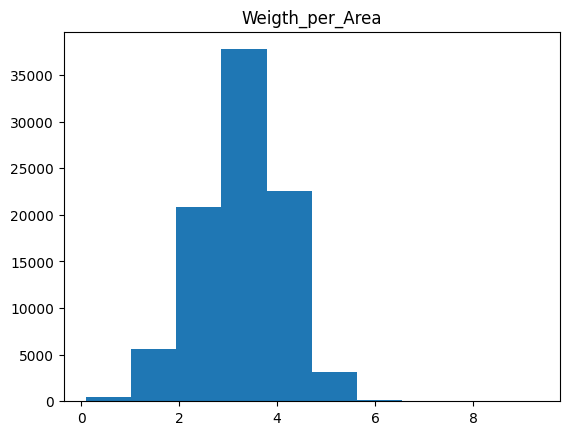

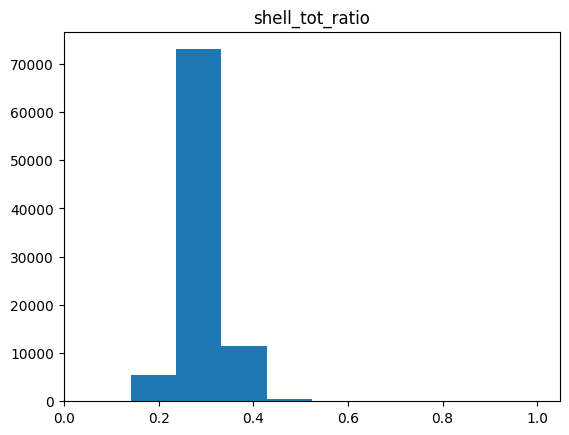

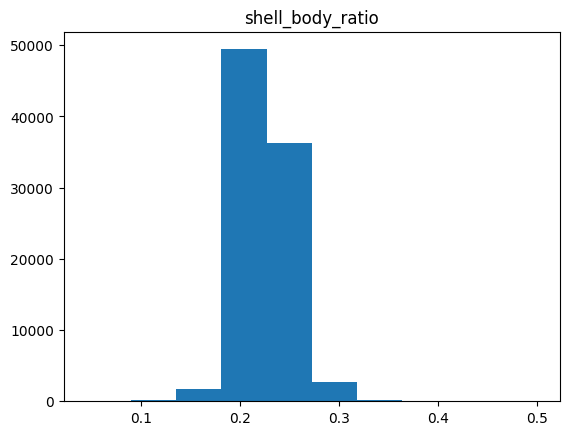

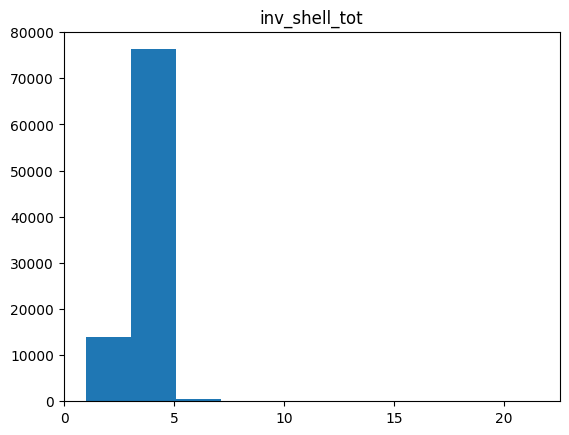

In [ ]:
for i in num_cols:
    plt.hist(X_train[i])
    plt.title(i)
    plt.show()

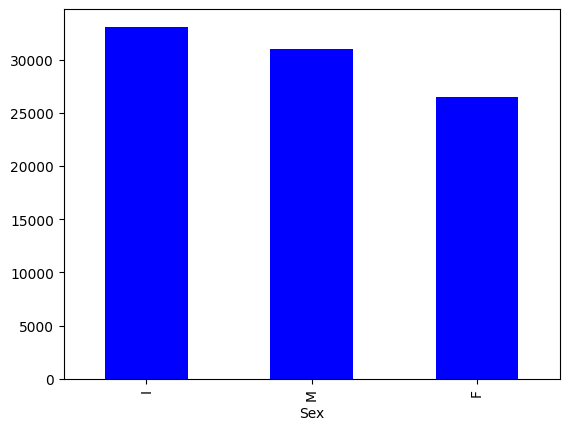

In [ ]:
X_train['Sex'].value_counts().plot(kind="bar",color='b')
plt.xlabel('Sex')
plt.show()

In [ ]:
X_train['Sex'] = X_train['Sex'].replace({'F': 0, 'M': 1,'I': 2})
X_test['Sex'] = X_test['Sex'].replace({'F': 0, 'M': 1,'I': 2})

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_val_scaled = scaler.transform(X_val)

X_test_scaled=scaler.transform(X_test)

In [ ]:
!pip install optuna
import optuna
import lightgbm as lgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 11.3 MB/s eta 0:00:00


In [ ]:
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'None',  # We'll use a custom metric (RMSLE)
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    return rmsle

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Number of finished trials:", len(study.trials))
print("Best trial:")
best_trial = study.best_trial
print("  Value: {}".format(best_trial.value))
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-05-02 04:44:13,208] A new study created in memory with name: no-name-36f58964-b108-4822-94e4-342bdcf5b4bc
[I 2024-05-02 04:44:16,406] Trial 0 finished with value: 0.15351656903230199 and parameters: {'lambda_l1': 2.272899377696013, 'lambda_l2': 3.051219246335629, 'num_leaves': 179, 'feature_fraction': 0.3597734237847692, 'bagging_fraction': 0.6736606661403655, 'bagging_freq': 7, 'min_child_samples': 43}. Best is trial 0 with value: 0.15351656903230199.
[I 2024-05-02 04:44:20,765] Trial 1 finished with value: 0.16134419894720006 and parameters: {'lambda_l1': 0.4110769200002473, 'lambda_l2': 2.4416123871395445, 'num_leaves': 184, 'feature_fraction': 0.12007181054368397, 'bagging_fraction': 0.23419539413105964, 'bagging_freq': 10, 'min_child_samples': 13}. Best is trial 0 with value: 0.15351656903230199.
[I 2024-05-02 04:44:24,278] Trial 2 finished with value: 0.15566123676338098 and parameters: {'lambda_l1': 5.395296549189871, 'lambda_l2': 7.303496695934762, 'num_leaves': 245, 'f

Number of finished trials: 100
Best trial:
  Value: 0.15191023003554927
  Params: 
    lambda_l1: 8.461896853938615
    lambda_l2: 3.891610014279321
    num_leaves: 80
    feature_fraction: 0.774510319977528
    bagging_fraction: 0.8853895974868016
    bagging_freq: 6
    min_child_samples: 85


In [ ]:
best_trial.params

{'lambda_l1': 1.9839580835584585,
 'lambda_l2': 3.293307917943501,
 'num_leaves': 113,
 'feature_fraction': 0.5625278533407012,
 'bagging_fraction': 0.9429971166095674,
 'bagging_freq': 9,
 'min_child_samples': 71}

In [ ]:
best_params={'lambda_l1': 1.9839580835584585,
 'lambda_l2': 3.293307917943501,
 'num_leaves': 113,
 'feature_fraction': 0.5625278533407012,
 'bagging_fraction': 0.9429971166095674,
 'bagging_freq': 9,
 'min_child_samples': 71
}
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = final_model.predict(X_test_scaled)



[LightGBM] [Warning] feature_fraction is set=0.5625278533407012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5625278533407012
[LightGBM] [Warning] lambda_l2 is set=3.293307917943501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.293307917943501
[LightGBM] [Warning] lambda_l1 is set=1.9839580835584585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9839580835584585
[LightGBM] [Warning] bagging_fraction is set=0.9429971166095674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9429971166095674
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5625278533407012, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5625278533407012
[LightGBM] [Warning] lambda_l2 is set=3.293307917943501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.293307917943501
[LightGBM] [Warning] lambda_l1 is set=1.

In [ ]:
indices = range(90615, 90615 + len(y_pred_test))
df = pd.DataFrame({'id': indices, 'Rings': y_pred_test})
df.to_csv('ab_lgb.csv', index=False)
print("created")

created
